<a href="https://colab.research.google.com/github/arnavd2001/iiitb_cnn/blob/main/fitlervisn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://github.com/bnsreenu/python_for_microscopists/blob/master/152-visualizing_conv_layer_outputs.py
#https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/
#https://www.saama.com/different-kinds-convolutional-filters/
#https://www1.icsi.berkeley.edu/~stellayu/publication/doc/2018similarityCVCS.pdf
#https://www.youtube.com/watch?v=16s3Pi1InPU

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from keras.models import Model
import cv2
import csv
import base64
from PIL import Image
import io
from skimage.metrics import structural_similarity
from skimage.filters import gaussian
from skimage import img_as_ubyte
import glob
import os
import itertools
from itertools import combinations
import pandas as pd
import seaborn as sns

In [5]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()

553476096/553467096 [==============================] - 5s 0us/step


block1_conv1 (3, 3, 3, 64)


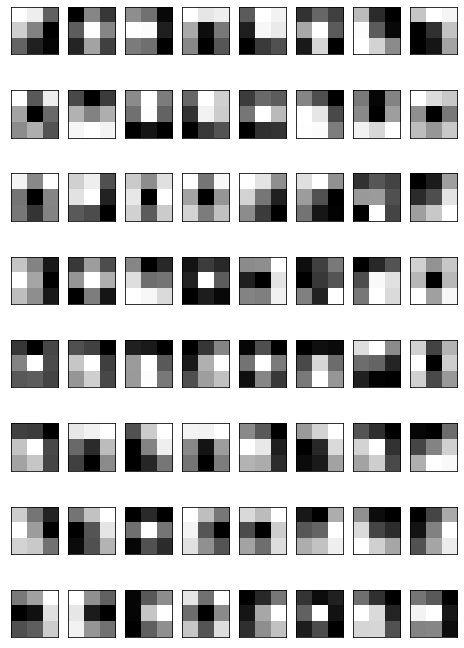

In [6]:
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

   
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :,0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()

In [7]:
#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
conv_layer_index = [2, 5, 9, 13, 17]
#conv_layer_index = [1, 3, 6]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/image1.jpg', target_size=(224, 224)) #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Layer : 1


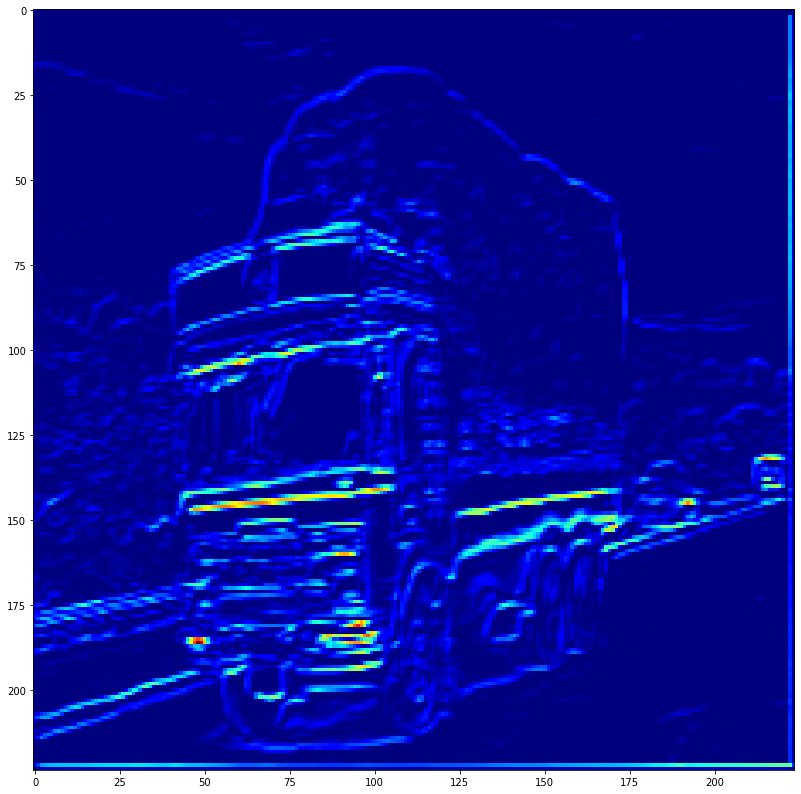

Layer : 2


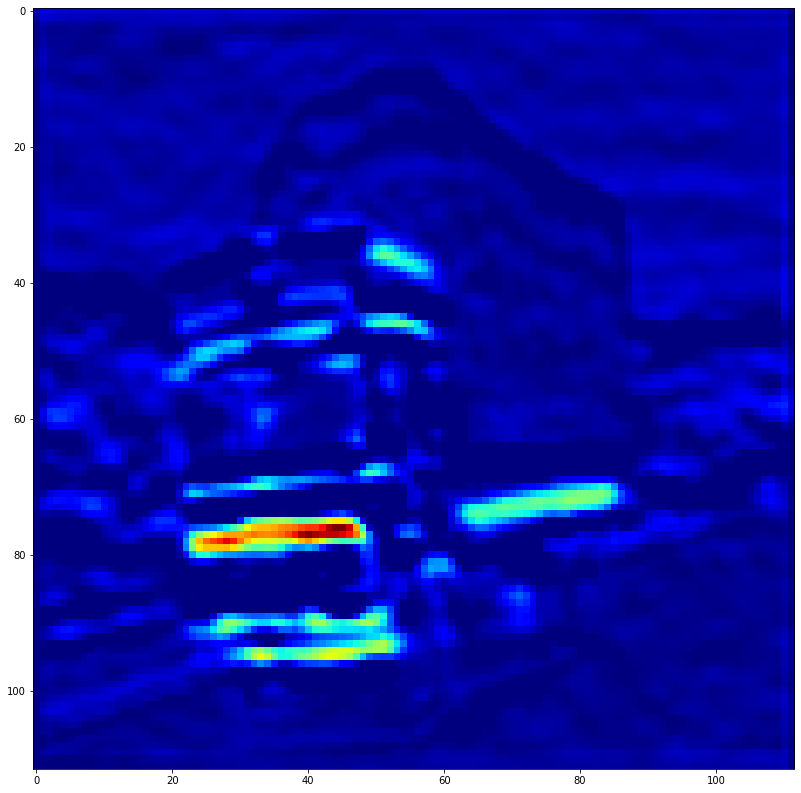

Layer : 3


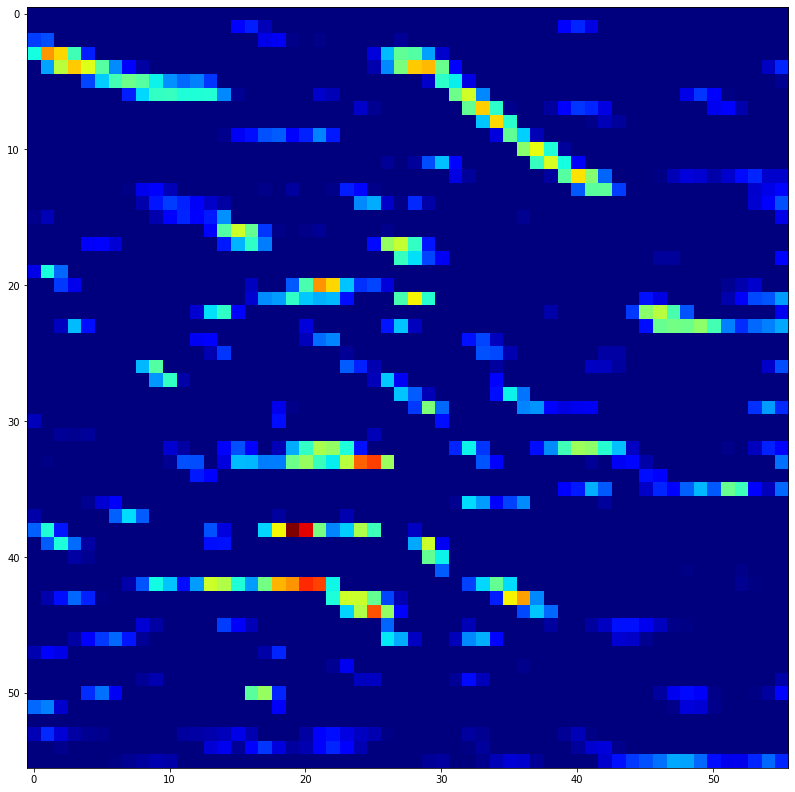

Layer : 4


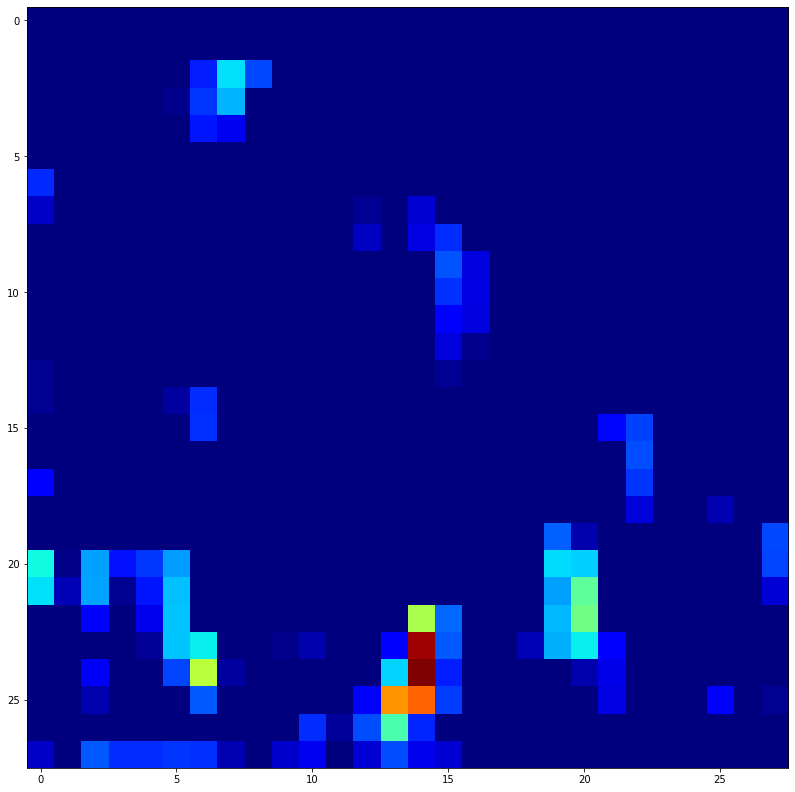

Layer : 5


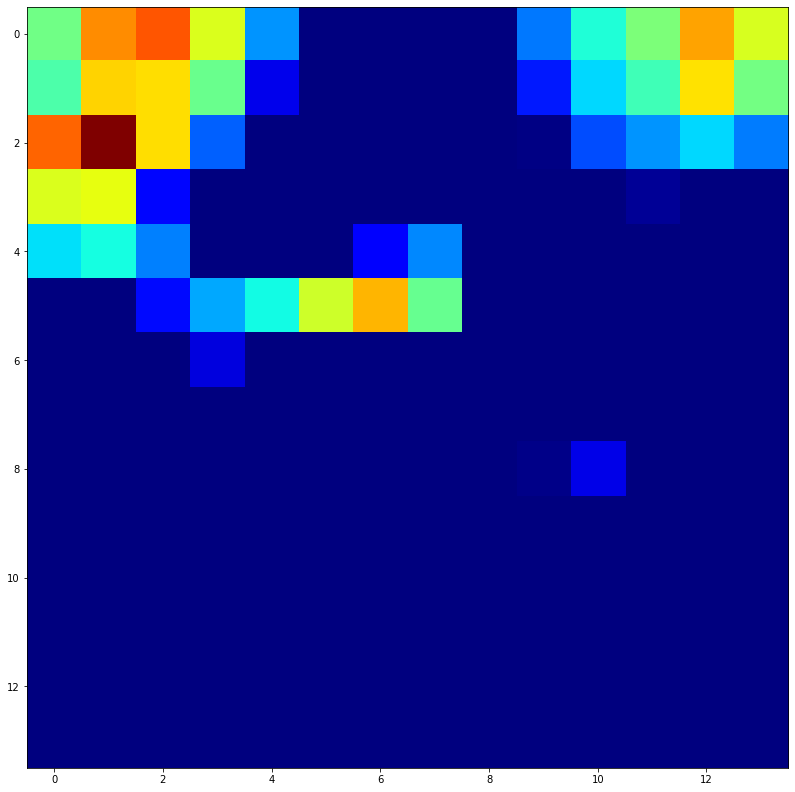

In [8]:
columns = 8
rows = 8
temp = 1 
import os
for ftr in feature_output: #5 baar ghumayega
    pos = 1
    print("Layer :",temp)
    os.mkdir(f'/content/drive/MyDrive/layer{temp}')
    fig=plt.figure(figsize=(14, 14)) #better visibility mentioned 14
    for i in range(1, columns*rows +1):
        fig =plt.plot(rows, columns)
        #fig.set_xticks([])  #Turn off axis
        #fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='jet')
        plt.savefig(f'/content/drive/MyDrive/layer{temp}/{i}.png')
        pos += 1
    temp +=1
    plt.show()


In [ ]:
"""columns = 8
rows = 8
temp = 1 
import os
for ftr in feature_output: #5 baar ghumayega
    pos = 1
    print("Layer :",temp)
    os.mkdir(f'/content/layer{temp}')
    for i in range(1, columns*rows +1):
        fig=plt.figure(figsize=(32, 32))
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='jet')
        #plt.savefig(f'/content/layer{temp}/{i}.png')
        cv2.imwrite('/content/layer{temp}/{i}.png', fig)
        pos += 1
    temp +=1
    plt.show()"""

'columns = 8\nrows = 8\ntemp = 1 \nimport os\nfor ftr in feature_output: #5 baar ghumayega\n    pos = 1\n    print("Layer :",temp)\n    os.mkdir(f\'/content/layer{temp}\')\n    for i in range(1, columns*rows +1):\n        fig=plt.figure(figsize=(32, 32))\n        fig =plt.subplot(rows, columns, i)\n        fig.set_xticks([])  #Turn off axis\n        fig.set_yticks([])\n        plt.imshow(ftr[0, :, :, i-1], cmap=\'jet\')\n        #plt.savefig(f\'/content/layer{temp}/{i}.png\')\n        cv2.imwrite(\'/content/layer{temp}/{i}.png\', fig)\n        pos += 1\n    temp +=1\n    plt.show()'

In [ ]:
#now firstly lets process the images in a directry using a loop


In [ ]:
def printPairs(arr, n):
    temp =0
    # Nested loop for all possible pairs
    for i in range(n):
        for j in range(n):
            print("(",arr[i],",",arr[j],")",end=", ")
            temp+=1
    print("\nthe following number of pairs we have per directory", temp)
# Driver code
 
arr=[64]
for i in range(64):
  arr.append(i)
n = 64
 
printPairs(arr,n)

( 64 , 64 ), ( 64 , 0 ), ( 64 , 1 ), ( 64 , 2 ), ( 64 , 3 ), ( 64 , 4 ), ( 64 , 5 ), ( 64 , 6 ), ( 64 , 7 ), ( 64 , 8 ), ( 64 , 9 ), ( 64 , 10 ), ( 64 , 11 ), ( 64 , 12 ), ( 64 , 13 ), ( 64 , 14 ), ( 64 , 15 ), ( 64 , 16 ), ( 64 , 17 ), ( 64 , 18 ), ( 64 , 19 ), ( 64 , 20 ), ( 64 , 21 ), ( 64 , 22 ), ( 64 , 23 ), ( 64 , 24 ), ( 64 , 25 ), ( 64 , 26 ), ( 64 , 27 ), ( 64 , 28 ), ( 64 , 29 ), ( 64 , 30 ), ( 64 , 31 ), ( 64 , 32 ), ( 64 , 33 ), ( 64 , 34 ), ( 64 , 35 ), ( 64 , 36 ), ( 64 , 37 ), ( 64 , 38 ), ( 64 , 39 ), ( 64 , 40 ), ( 64 , 41 ), ( 64 , 42 ), ( 64 , 43 ), ( 64 , 44 ), ( 64 , 45 ), ( 64 , 46 ), ( 64 , 47 ), ( 64 , 48 ), ( 64 , 49 ), ( 64 , 50 ), ( 64 , 51 ), ( 64 , 52 ), ( 64 , 53 ), ( 64 , 54 ), ( 64 , 55 ), ( 64 , 56 ), ( 64 , 57 ), ( 64 , 58 ), ( 64 , 59 ), ( 64 , 60 ), ( 64 , 61 ), ( 64 , 62 ), ( 0 , 64 ), ( 0 , 0 ), ( 0 , 1 ), ( 0 , 2 ), ( 0 , 3 ), ( 0 , 4 ), ( 0 , 5 ), ( 0 , 6 ), ( 0 , 7 ), ( 0 , 8 ), ( 0 , 9 ), ( 0 , 10 ), ( 0 , 11 ), ( 0 , 12 ), ( 0 , 13 ), ( 0 , 14

In [ ]:
os.chdir('/content/layer5')
#just need to change the location of the directory to wherever the images are stored

In [ ]:
temp=[]
#Works well with images of different dimensions
def orb_sim(img1, img2):
  # SIFT is no longer available in cv2 so using ORB
  orb = cv2.ORB_create()

  # detect keypoints and descriptors
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  # define the bruteforce matcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
  #perform matches. 
  matches = bf.match(desc_a, desc_b)
  #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
  similar_regions = [i for i in matches if i.distance < 50]  
  if len(matches) == 0:
    return 0
  return len(similar_regions) / len(matches)


#Needs images to be same dimensions
def structural_sim(img1, img2):
  sim, diff = structural_similarity(img1, img2, full=True, multichannel = True)
  return sim



  #1.0 means identical. Lower = not similar




#1.0 means identical. Lower = not similar


In [ ]:
filename = "image1_layer5.csv"
fields = ['Files Compared', 'ORB', 'SSIM']
rows = []

In [ ]:
lis= os.listdir()
res = list(combinations(lis, 2))
for i in res:
  img1 = cv2.imread(i[0])
  img2 = cv2.imread(i[1])
  ssim = structural_sim(img1, img2)
  orb_similarity = orb_sim(img1, img2)
  mini_row =[i,orb_similarity,ssim]
  rows.append(mini_row)

  #print(i)
  #print("Similarity using ORB is:", orb_similarity)
  #print("Similarity using SSIM is: ", ssim)
   

In [ ]:
"""img_number = 1
for image in range(img.shape[0]):
    input_img = img[image,:,:]  #Grey images. For color add another dim.
    smoothed_image = img_as_ubyte(gaussian(input_img, sigma=5, mode='constant', cval=0.0)/255)

    cv2.imwrite("test_images/smoothed/smoothed_image"+str(img_number)+".jpg", smoothed_image)
    img_number +=1"""

'img_number = 1\nfor image in range(img.shape[0]):\n    input_img = img[image,:,:]  #Grey images. For color add another dim.\n    smoothed_image = img_as_ubyte(gaussian(input_img, sigma=5, mode=\'constant\', cval=0.0)/255)\n\n    cv2.imwrite("test_images/smoothed/smoothed_image"+str(img_number)+".jpg", smoothed_image)\n    img_number +=1'

In [ ]:
# Compare the Indexes, and over a certain threshold we can return the pairs
# If we have certian pairs that are not causing any discrepancy then we can eliminate those pairs
# ORB and SSIM should have a similar output giving capability

In [ ]:
# Use Edge Detection filter and some other random filter, pre defined. We know what output will it give. Compare through SSIM and ORB, output should be diff
# we can verify SSIM and ORB in this fashion


#data visualization
#filter values
#histogram

In [ ]:
filename = "results_layer5.csv"
    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)